In [1]:


red = pd.read_csv(here("db/wine+quality/winequality-red.csv"), sep=";")
white = pd.read_csv(here("db/wine+quality/winequality-white.csv"), sep=";")
red["type"] = "red"
white["type"] = "white"
wine = pd.concat([red, white], axis=0)
wine

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ap9169\\wine-quality\\db\\wine+quality\\winequality-red.csv'

In [12]:
import requests
import zipfile
import io
import pandas as pd
from pyprojroot.here import here

def download_and_load_csvs_from_zip(zip_url, csv_paths: str | list[str]) -> list:
    if type(csv_paths) is str: csv_paths = [csv_paths]
    response = requests.get(zip_url)
    assert response.status_code == 200, response.status_code
    with zipfile.ZipFile(io.BytesIO(response.content)) as the_zip:
        dataframes = []
        for path in csv_paths:
            with the_zip.open(path) as csv_file:
                csv_content = csv_file.read().decode('utf-8')
                df = pd.read_csv(io.StringIO(csv_content), delimiter=";")
                dataframes.append(df)
    return dataframes

red, white = download_and_load_csvs_from_zip("https://archive.ics.uci.edu/static/public/186/wine+quality.zip", ["winequality-red.csv", "winequality-white.csv"])


red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

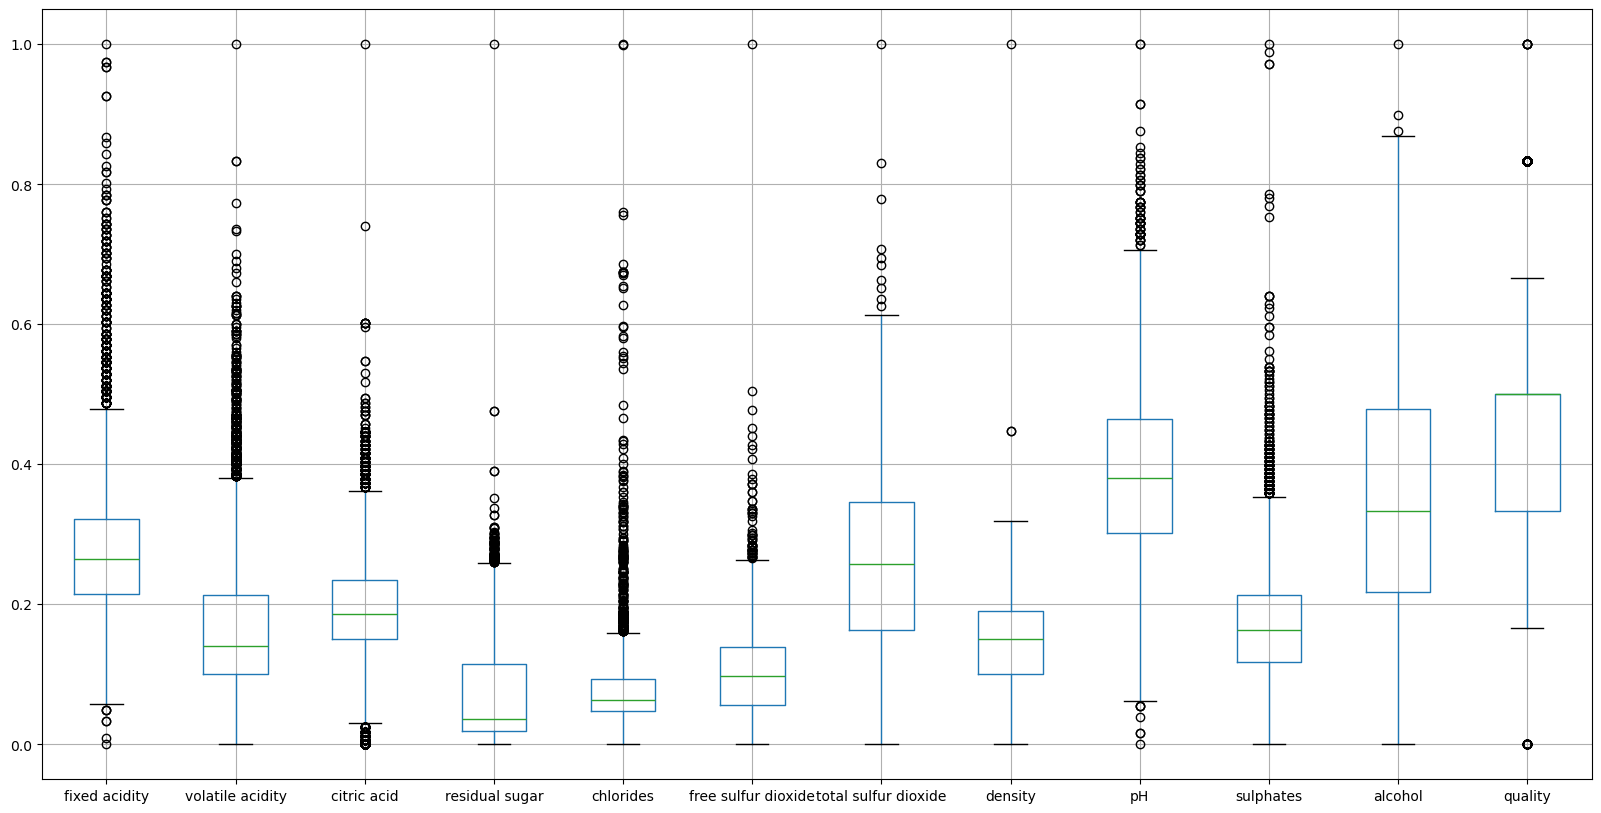

In [3]:
# normalize data
wine_ = wine.drop(columns=["type"])
wine_norm = (wine_ - wine_.min()) / (wine_.max() - wine_.min())
# boxplot all columns
wine_norm.boxplot(figsize=(20, 10))

In [4]:
wine.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897
fixed acidity,7.4,7.8,7.8,11.2,7.4,7.4,7.9,7.3,7.8,7.5,...,6.8,4.9,6.1,5.7,6.5,6.2,6.6,6.5,5.5,6.0
volatile acidity,0.7,0.88,0.76,0.28,0.7,0.66,0.6,0.65,0.58,0.5,...,0.22,0.235,0.34,0.21,0.23,0.21,0.32,0.24,0.29,0.21
citric acid,0.0,0.0,0.04,0.56,0.0,0.0,0.06,0.0,0.02,0.36,...,0.36,0.27,0.29,0.32,0.38,0.29,0.36,0.19,0.3,0.38
residual sugar,1.9,2.6,2.3,1.9,1.9,1.8,1.6,1.2,2.0,6.1,...,1.2,11.75,2.2,0.9,1.3,1.6,8.0,1.2,1.1,0.8
chlorides,0.076,0.098,0.092,0.075,0.076,0.075,0.069,0.065,0.073,0.071,...,0.052,0.03,0.036,0.038,0.032,0.039,0.047,0.041,0.022,0.02
free sulfur dioxide,11.0,25.0,15.0,17.0,11.0,13.0,15.0,15.0,9.0,17.0,...,38.0,34.0,25.0,38.0,29.0,24.0,57.0,30.0,20.0,22.0
total sulfur dioxide,34.0,67.0,54.0,60.0,34.0,40.0,59.0,21.0,18.0,102.0,...,127.0,118.0,100.0,121.0,112.0,92.0,168.0,111.0,110.0,98.0
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978,...,0.9933,0.9954,0.98938,0.99074,0.99298,0.99114,0.9949,0.99254,0.98869,0.98941
pH,3.51,3.2,3.26,3.16,3.51,3.51,3.3,3.39,3.36,3.35,...,3.04,3.07,3.06,3.24,3.29,3.27,3.15,2.99,3.34,3.26
sulphates,0.56,0.68,0.65,0.58,0.56,0.56,0.46,0.47,0.57,0.8,...,0.54,0.5,0.44,0.46,0.54,0.5,0.46,0.46,0.38,0.32


In [5]:
# export to csv
wine.to_csv(here("db/wine+quality/winequality.csv"), index=False)

In [6]:
# get quality column

wine["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64

In [7]:
# check for null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [8]:
# check for duplicates
wine[wine.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
4855,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white
4879,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,white


In [9]:
# show distribution
import matplotlib.pyplot as plt

wine["quality"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='quality'>

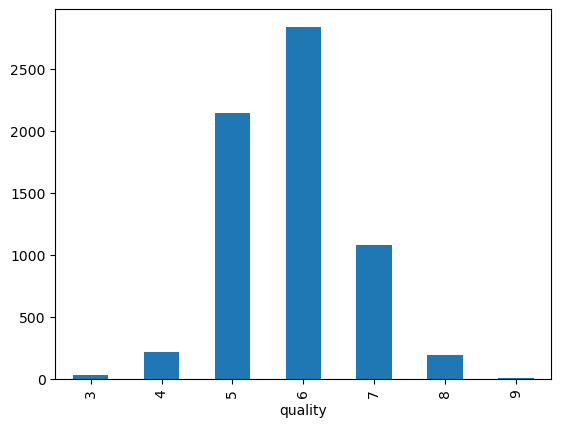

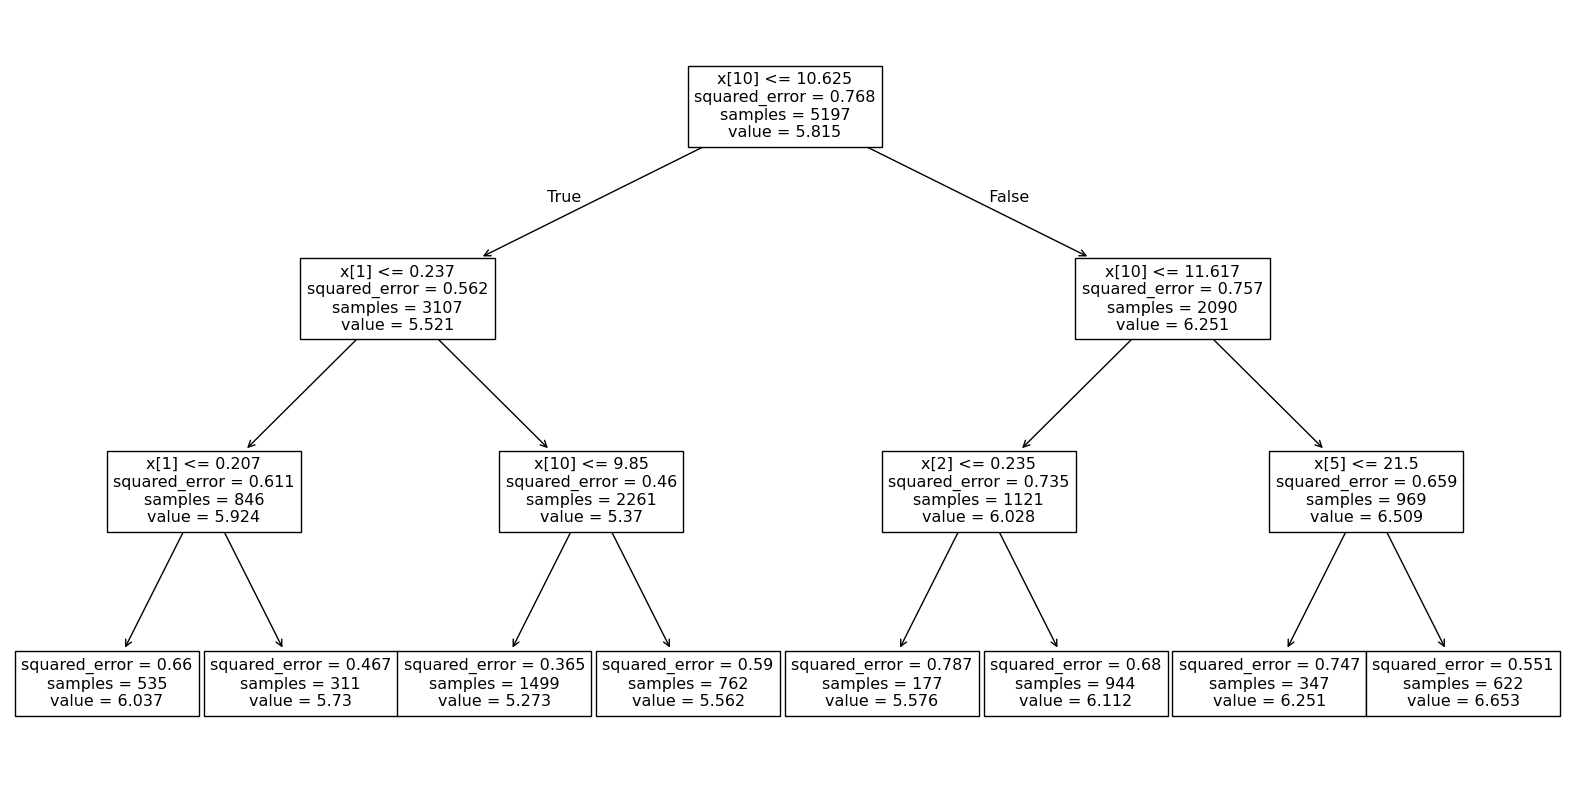

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Prepare the data
X = wine.drop(columns=['quality', "type"])
y = wine['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeRegressor(random_state=42, max_depth=3, )

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# plot the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf)
plt.show()

In [11]:
y_pred

array([6.65273312, 5.56167979, 6.65273312, ..., 6.65273312, 5.27284857,
       6.03738318])

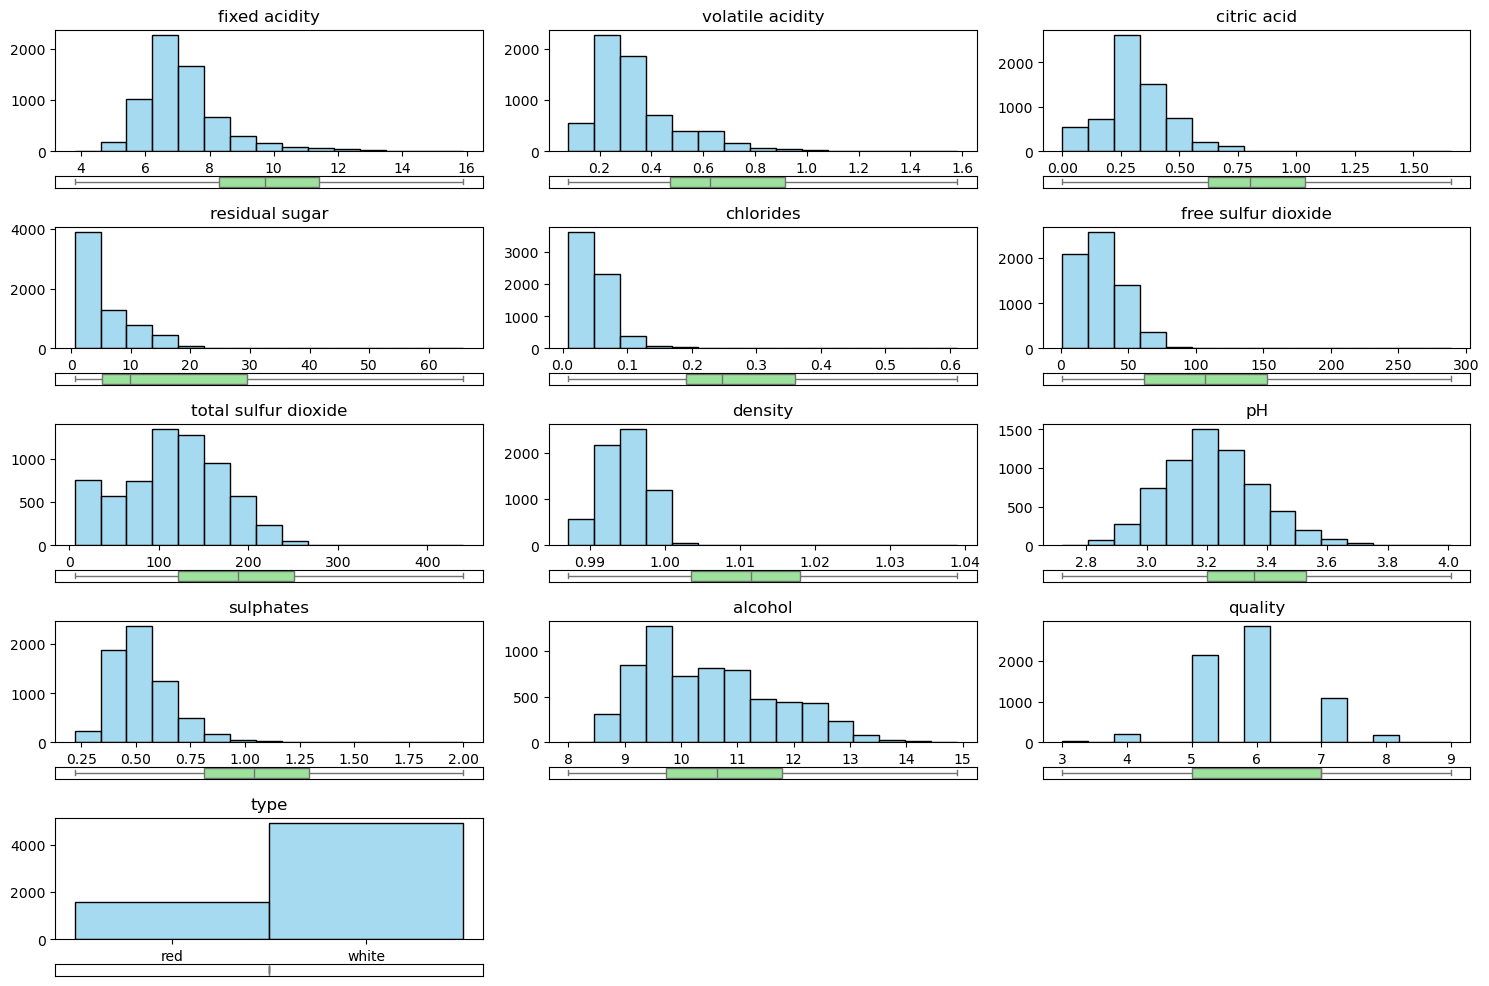

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_boxplot(data, features, ncols=2, figsize=(20,20), bins=15):
    """
    Plots histograms and boxplots for a list of features from a given dataset.

    Parameters:
    data (DataFrame): The dataset containing the features.
    features (list): List of feature names (strings) to plot.
    ncols (int): Number of columns for the subplot grid (default is 2).
    figsize (tuple): Size of the overall figure (default is (12, 8)).
    """
    
    # Number of features and calculation of the number of rows
    nrows = (len(features) + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)    
    axs = axs.flatten()
    for i, feature in enumerate(features):
        sns.histplot(data[feature], ax=axs[i], kde=False, color="skyblue", bins=bins)
        ax_box = axs[i].inset_axes([0, -0.3, 1, 0.1])  # top, bottom, left, right
        sns.boxplot(data[feature], ax=ax_box, color="lightgreen", orient="h",)        
        ax_box.set(xlabel='', ylabel='')
        ax_box.set_xticks([])
        ax_box.set_yticks([])        
        axs[i].set_title(f'{feature}')
        # remove labels
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')

    # Hide any extra empty subplots (if num_features is not perfectly divisible by ncols)
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    plt.tight_layout() # prevent overlap
    plt.show()

plot_histogram_boxplot(wine, wine.columns, ncols=3, figsize=(15, 10))

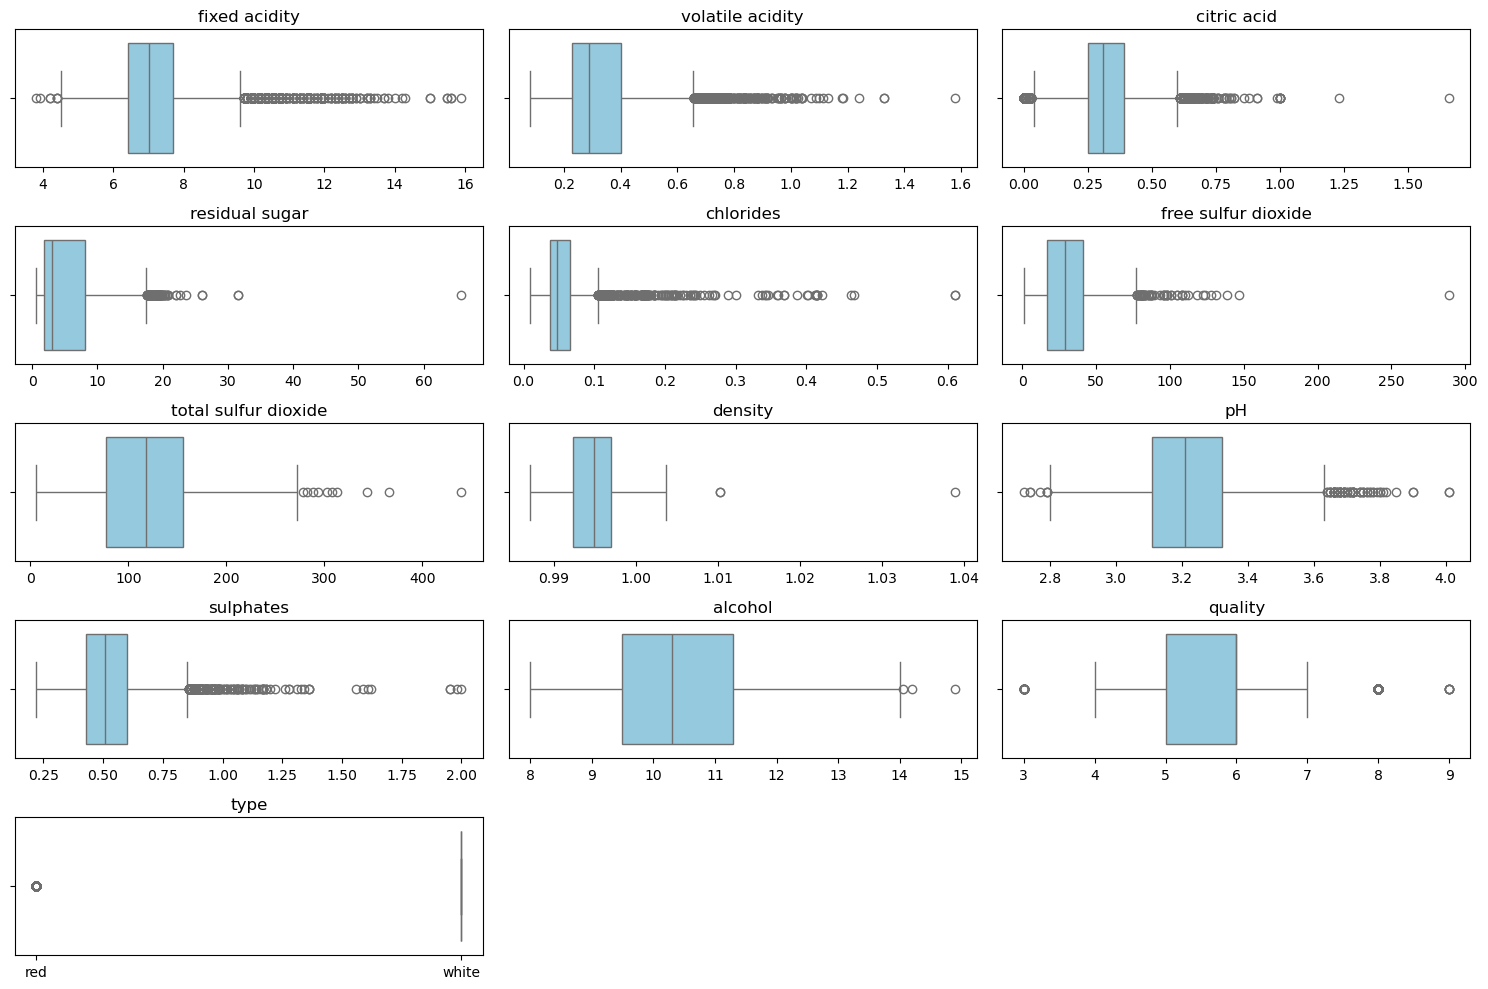

In [62]:
sns.violinplot(data=wine, )

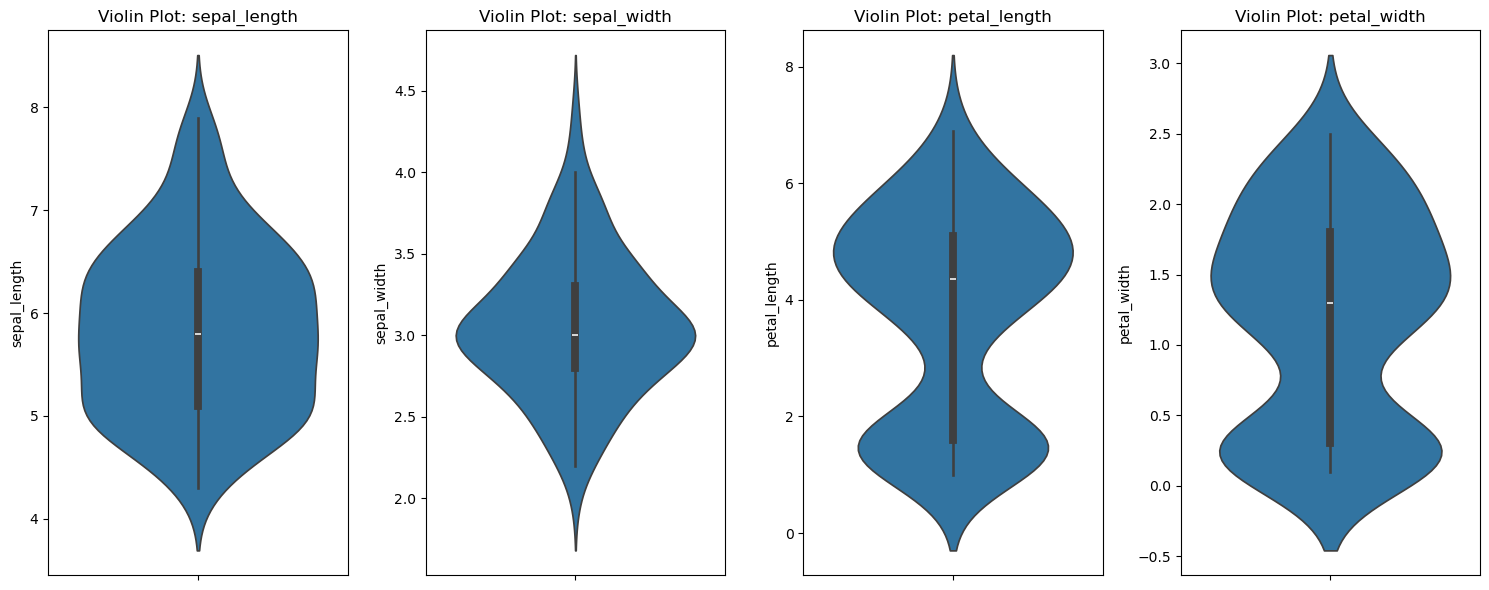

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset (you can use your own DataFrame here)
df = sns.load_dataset('iris')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns)-1, figsize=(15, 6))

# Loop through each feature and create a violin plot
for i, column in enumerate(df.columns[:-1]):  # Skip the last categorical column (e.g. species)
    sns.violinplot(ax=axes[i], y=df[column])
    axes[i].set_title(f"Violin Plot: {column}")

plt.tight_layout()
plt.show()
